In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Reading the Dataset

In [2]:
df=pd.read_csv('Dataset.csv')
df

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,NaN,15,15.0,16,18.0,2.0,1.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,NaN,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,NaN,1.0,4.0,no


Level 1: Variable Identification Protocol

Plotting a correlation matrix b/w all the numerical features to predict the anonymous features by considering only numerical features

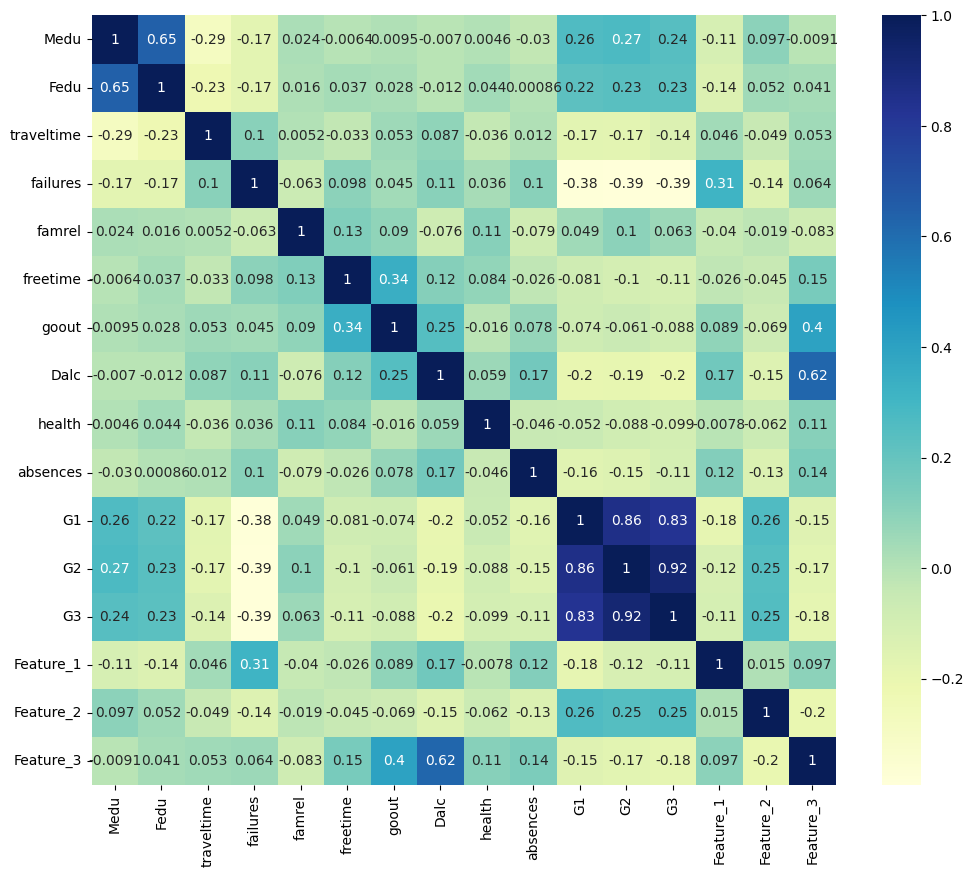

In [3]:
co_mtx=df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(co_mtx,cmap="YlGnBu",annot=True)
plt.show()

From above correlation matrix, predicting what the features 1, 2 & 3 represent
In the below Predcitions I am considering only relatively good correlated features and predicted the anonymous ones

Predicting Feature_1:
From the above plot we can see that Feature_1 is inversly proportional to grades, father and mother education and directly proportional to failures, alcohol consumption and absences. So, I am thinking that Feature_1 can be stress because, if the grades are low then practically stress will be high and if the education level of family is low then obvoiusly the person have some more burden on him and more stress leads to more alcohol consumption, failures and absences. So, In the above way I am thinking that Feature_1 can be Stress Factor.

Predicting Feature_2:
From the above plot we can see that Feature_2 is inversly proportional to dialy alcohol consumption, absences and failure and directly proportional to grades. So, I am thinking that Feature_2 is most likely to be studytime because, generally more studytime implies more grades and therefore, less failures and less absences and less alcohol consumption. So, as above I am thinking Feature_2 can be Study time.

Predicting Feature_2:
From the above plot we can see that Feature_3 is strongly proportional to daily alcohol consumption and going out and moderately proportional to freetime, absences and moderately inversely proportional to grades. So, I am thinking that Feature_3 can be no of parties attending in a week because,
if one person is attending more parties then it implies that he frequently goes out and high chance of more alcohol consumption and therefore may get less grades. So, I am thinking Feature_3 can be no of parties attending in a week.


In a nutshell, The below are my predictions on Features 1, 2& 3

Feature_1    :    Stress Factor

Feature_2    :    Study Time

Feature_3    :    No.of parties attending in a week







Level 2: Data Integrity Audit

In [4]:
df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

Filling missing values and giving explanations:

I think the best way to fill a categorical column is by filling it with Mode(same as Median in this case) Because, there is no way we can fill that with mean since it is a categorical column.


Coming to numerical columns, For those columns which have less range of values (for eg 1-5), I think the best way is to fill them with Mode because filling it with median makes no sense because, consider an example you have the set {1,1,2,2,2,5,5,5,5} Here, if you take median then you are completely neglecting all the 5's right there and we can also see that mean is nearer to 3 whereas median is 2 and mode is 5 and for columns which have more range of values (for eg 1-20) I would choose the mean value suppose you have a set {1,2,2,2,2,20,20,20} as we can see choosing mode and median will not be a good choice i think


In [5]:
# filling categorical columns with mode (most frequent value)
for co in df.columns:
    if df[co].dtype=='object':
        df[co]=df[co].fillna(df[co].mode()[0])

In [6]:
# filling large range columns with mean value
lar_ran_cols=['G2','Feature_1']
for co in lar_ran_cols:
    df[co]=df[co].fillna(df[co].mean())

In [7]:
# filling the remaining columns(small range columns) with mode
for co in df.columns:
    df[co]=df[co].fillna(df[co].mode()[0])

In [8]:
df.isna().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
health        0
absences      0
G1            0
G2            0
G3            0
Feature_1     0
Feature_2     0
Feature_3     0
romantic      0
dtype: int64

Level 3: Exploratory Insight Report


Question 1: Do you think that being in a relationship spoil ones grades?

In [9]:
# coverting romantic variable into 0/1 0->not romantic and 1-> the opposite
df['romantic_new']=df['romantic'].map({'yes':1,'no':0})

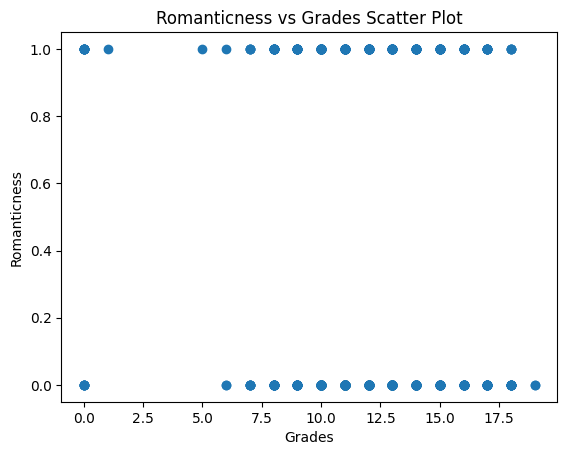

In [10]:
plt.scatter(df['G3'], df['romantic_new'])
plt.title('Romanticness vs Grades Scatter Plot') 
plt.xlabel('Grades')
plt.ylabel('Romanticness')
plt.show()

From the above scatter plot we can see that relationships does not affect the grades of a particular student. There are students who have higher grades even if they are romantic and there are also students who have lower grades even though they are not romantic. So by the above plot we can say that performance of a student and being romantic are almost independent of each other.


Question 2: Whom do you think perform better in exams ? Male or Female ?

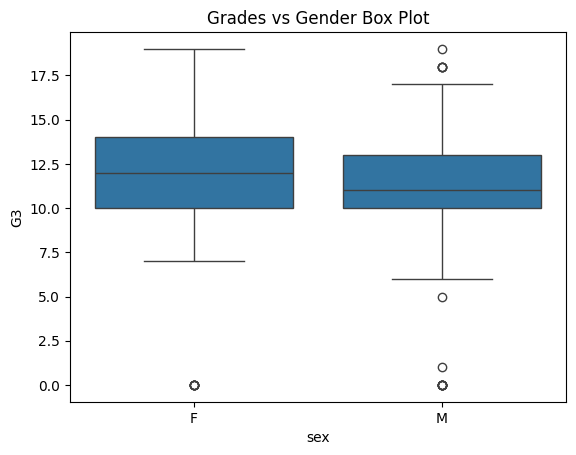

In [11]:
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Grades vs Gender Box Plot')
plt.show()

Yeah now, from the above box plot we can see that the median grade of females is higher than that of males which suggests that female students are performing better than male ones. we can also see the outliers of the plot male students have more outliers (with lesser grades and higher grades too) compared to that of females which sugegst that most of male students are performing average and some are performing worse than average and some with higher grades. Whereas if we see female students there are very less outliers which suggests that all the female students are performing in a comparatively near range.




Question 3: Does Quality of family relationships related to romanticness of a student?

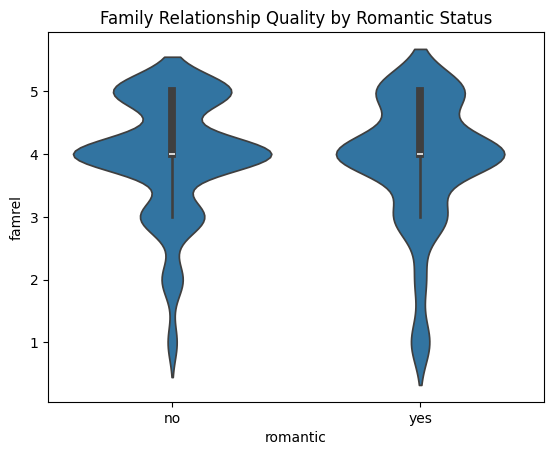

In [12]:
sns.violinplot(x='romantic',y='famrel',data=df)
plt.title('Family Relationship Quality by Romantic Status')
plt.show()

From the above violin plot we can see that the quality of family relationships does not actually affect ones romanticness as we can see that the both groups have similar distributions with most students rating their family relationship quality as high(around 4 out of 5).


Question 4: Does Parental Education affect student performance?

C:\Users\admin\AppData\Local\Temp\ipykernel_20496\3476383298.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Max_Par_Edu',y='G3',data=df,estimator='mean',ci='sd')


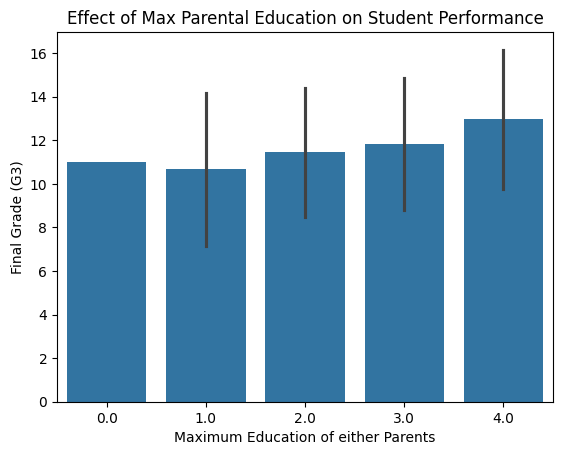

In [13]:
df['Max_Par_Edu']=df[['Medu','Fedu']].max(axis=1) # creating a new column which is max(fedu,medu)
sns.barplot(x='Max_Par_Edu',y='G3',data=df,estimator='mean',ci='sd')
plt.title('Effect of Max Parental Education on Student Performance')
plt.xlabel('Maximum Education of either Parents')
plt.ylabel('Final Grade (G3)')
plt.show()

Higher Parental education i.e, particularly when atleast one parent has a high level of education(level 4) is expected to perform better in academics. So parental education will be an important factor that affects ones grades.


Question 5: Does Internet Access affect Extra curiccular activities?

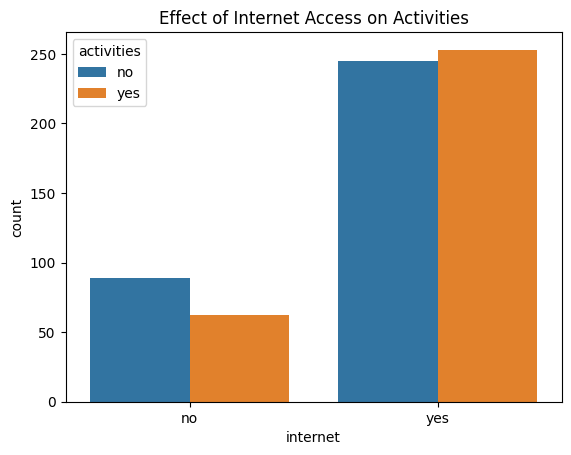

In [14]:
sns.countplot(x='internet',hue='activities',data=df)
plt.title('Effect of Internet Access on Activities')
plt.show()

Among non-internet users most of the people are not doing any other extra curiccular activites whereas among the internet users nearly half of the people are engaged in activities and the other half are not.So we can see that people who use internet are more involved in other activities.

Level 4: Relationship Prediction Model

I think the below columns are useful to predict romanticness

1. Sex

2. address

3. famsize

4. Pstatus

5. Medu & Fedu

6. guardian

7. failures

8. famsup

9. activities

10. internet

11. famrel

12. freetime & goout

13. Dalc

14. absences

15. G1,G2&G3

16. Features 1,2&3

In [15]:
from sklearn.preprocessing import OneHotEncoder

yn_cols=['romantic','famsup','activities','internet'] # these are yes or no columns which can be mapped directly
cat_cols=['sex','address','famsize','Pstatus','guardian','famsup'] # these are normal categorical columns which are to be encoded

for col in yn_cols:
    df[col]=df[col].map({'yes':1,'no':0})   # replacing yes/no columns with 1/0 respectively

ohe=OneHotEncoder(drop='first',sparse_output=False)  # using one hot encoding to convert categorical columns into numerical ones
new_cats=ohe.fit_transform(df[cat_cols])
enc_df=pd.DataFrame(new_cats,columns=ohe.get_feature_names_out(cat_cols))
df=pd.concat([df,enc_df],axis=1)

In [16]:
col_drp=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','traveltime','schoolsup','paid','nursery','higher','health','romantic_new','Max_Par_Edu']
df=df.drop(columns=col_drp)

In [17]:
df

,Medu,Fedu,failures,famsup,activities,internet,famrel,freetime,goout,Dalc,...,Feature_2,Feature_3,romantic,sex_M,address_U,famsize_LE3,Pstatus_T,guardian_mother,guardian_other,famsup_1
0,4,4.0,0,0,0,0,4,3.0,4,1,...,2.0,1.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1.0,0,1,0,1,5,3.0,3,1,...,2.0,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1,1.0,0,0,0,1,4,3.0,2,2,...,2.0,3.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,4,2.0,0,1,1,1,3,2.0,2,1,...,3.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,3,3.0,0,1,0,0,4,3.0,2,1,...,2.0,2.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,3.0,1,0,1,1,5,4.0,2,1,...,3.0,2.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
645,3,1.0,0,1,0,1,4,3.0,4,1,...,2.0,1.0,0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
646,1,1.0,0,0,1,0,1,1.0,1,1,...,2.0,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
647,3,1.0,0,0,0,1,2,4.0,5,3,...,1.0,4.0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


Now let us split the data into training and testing data and then Scale the data

In [18]:
y=df['romantic']
X=df.drop(columns='romantic')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X_train_new=scl.fit_transform(X_train)
X_test_new=scl.transform(X_test)


Applying Logistic Regression and evaluating the score

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_new,y_train)
lr.score(X_test_new,y_test)

0.6205128205128205

In [24]:
y_pred_lr=lr.predict(X_test_new)
y_pred_lr

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc_lr=accuracy_score(y_test,y_pred_lr)
pre_lr=precision_score(y_test,y_pred_lr)
rec_lr=recall_score(y_test,y_pred_lr)
f1_lr=f1_score(y_test,y_pred_lr)
print(acc_lr)
print(pre_lr)
print(rec_lr)
print(f1_lr)

0.6205128205128205
0.5862068965517241
0.21518987341772153
0.3148148148148148


From the above different types of scores we can see that the model misses nearly 90% of actual relationships and when it predicts that a person is in a relationship nearly 65% of predicted were actually not. So, it think the data may be non linear.

Applying Decision Tree Model and evaluating score

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.5846153846153846

In [27]:
y_pred_dtc=dtc.predict(X_test)
y_pred_dtc

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [28]:
acc_dtc=accuracy_score(y_test,y_pred_dtc)
pre_dtc=precision_score(y_test,y_pred_dtc)
rec_dtc=recall_score(y_test,y_pred_dtc)
f1_dtc=f1_score(y_test,y_pred_dtc)
print(acc_dtc)
print(pre_dtc)
print(rec_dtc)
print(f1_dtc)

0.5846153846153846
0.48484848484848486
0.4050632911392405
0.4413793103448276


From above we can see that Decision tree classifier performs better (i.e, have more total accuracy) than linear regression , it nearly identifies 40% of relationships correctly and when it predicts if a person is in relationship 50% of them were actually not in relationship.

Applying Random forest classifier and evaluating

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.6

In [30]:
y_pred_rfc=rfc.predict(X_test)
y_pred_rfc

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [31]:
acc_rfc=accuracy_score(y_test,y_pred_rfc)
pre_rfc=precision_score(y_test,y_pred_rfc)
rec_rfc=recall_score(y_test,y_pred_rfc)
f1_rfc=f1_score(y_test,y_pred_rfc)
print(acc_rfc)
print(pre_rfc)
print(rec_rfc)
print(f1_rfc)

0.6
0.52
0.16455696202531644
0.25


We can see that it misses 90% of actual relationships and when it predicts if a person is in relationship 50% were actually not in relationship. accuracy wise it is nearly same as that of decision tree but it has less f1 score than that of decision tree

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5846153846153846

In [33]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [34]:
acc_knn=accuracy_score(y_test,y_pred_knn)
pre_knn=precision_score(y_test,y_pred_knn)
rec_knn=recall_score(y_test,y_pred_knn)
f1_knn=f1_score(y_test,y_pred_knn)
print(acc_knn)
print(pre_knn)
print(rec_knn)
print(f1_knn)

0.5846153846153846
0.45454545454545453
0.12658227848101267
0.19801980198019803


we can see that knn is also nearly same as that of random forest classifier